In [30]:
import pandas as pd 
import numpy as np
from scipy.stats import probplot
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
import warnings

In [31]:
df = pd.read_csv('TravelInsurancePrediction.csv',usecols=['Age','AnnualIncome','FamilyMembers','TravelInsurance'])

In [32]:
df

,Age,AnnualIncome,FamilyMembers,TravelInsurance
0,31,400000,6,0
1,31,1250000,7,0
2,34,500000,4,1
3,28,700000,3,0
4,28,700000,8,0
...,...,...,...,...
1982,33,1500000,4,1
1983,28,1750000,5,0
1984,28,1150000,6,0
1985,34,1000000,6,1


In [33]:
df.isnull().sum()

Age                0
AnnualIncome       0
FamilyMembers      0
TravelInsurance    0
dtype: int64

In [34]:
X = df.iloc[:,:3]
y = df.iloc[:,3:]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42) 

In [36]:
X_train.shape, X_test.shape

((1589, 3), (398, 3))

Without function transforming

C:\Users\Neelesh Yadav\AppData\Local\Temp\ipykernel_7012\1804338255.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['AnnualIncome'])


Text(0.5, 1.0, 'Annual Income QQ plot')

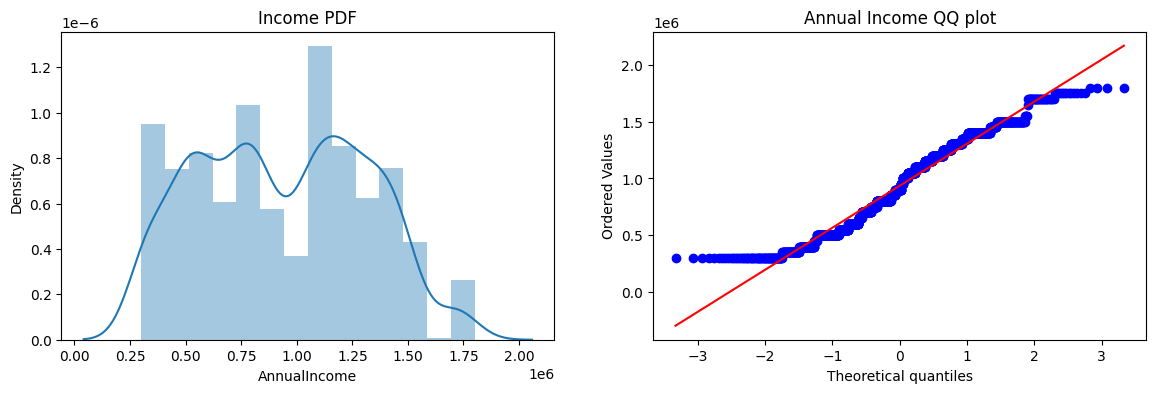

In [61]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['AnnualIncome'])
plt.title('Income PDF')

plt.subplot(122)
probplot(X_train['AnnualIncome'], dist='norm', plot=plt)
plt.title('Annual Income QQ plot')

C:\Users\Neelesh Yadav\AppData\Local\Temp\ipykernel_7012\841261034.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'Age QQ plot')

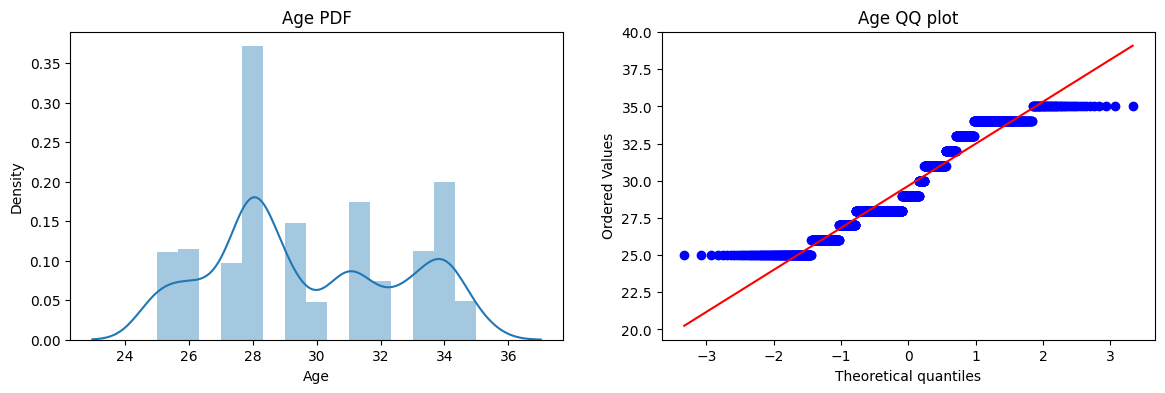

In [60]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

In [41]:
lr = LinearRegression()
dt = DecisionTreeClassifier()

In [42]:
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test) 

In [44]:
from sklearn.metrics import roc_auc_score

# Assuming lr_pred and dt_pred are your model predictions (probabilities or scores)
print('Lr AUC Score --->', roc_auc_score(y_test, lr_pred))
print('Dt AUC Score --->', roc_auc_score(y_test, dt_pred))


Lr AUC Score ---> 0.7239837734911831
Dt AUC Score ---> 0.7903110080856582


with function transforming 

In [45]:
tf = FunctionTransformer(func=np.log1p)

In [46]:
X_train_trans = tf.fit_transform(X_train)
X_test_trans = tf.transform(X_test)

In [47]:
lr = LinearRegression()
dt = DecisionTreeClassifier()

In [48]:
lr.fit(X_train_trans,y_train)
dt.fit(X_train_trans,y_train)

DecisionTreeClassifier()

In [49]:
lr_pred = lr.predict(X_test_trans)
dt_pred = dt.predict(X_test_trans)

In [50]:
print('Lr AUC Score --->', roc_auc_score(y_test, lr_pred))
print('Dt AUC Score --->', roc_auc_score(y_test, dt_pred))

Lr AUC Score ---> 0.7173883047713663
Dt AUC Score ---> 0.7864199575020007


((array([-3.32878992, -3.07327994, -2.93129121, ...,  2.93129121,
          3.07327994,  3.32878992]),
  array([12.61154109, 12.61154109, 12.61154109, ..., 14.40329778,
         14.40329778, 14.40329778])),
 (0.4459592765394671, 13.653985918714728, 0.9700607939576384))

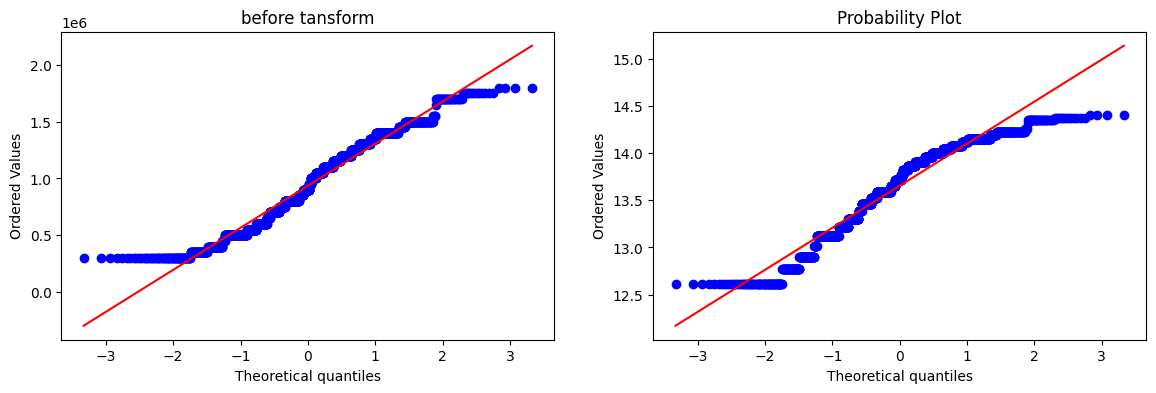

In [58]:
plt.figure(figsize=(14,4))
plt.subplot(121)
probplot(X_train['AnnualIncome'],dist='norm', plot=plt)
plt.title('before tansform')

plt.subplot(122)
probplot(X_train_trans['AnnualIncome'],dist='norm',plot=plt)